# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful sklearn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems 
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [97]:
what_were_covering=[
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together"
]

In [3]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [99]:
# 1. Get the data ready
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [100]:
#1. Create x(feature matrix = whole dataset without target column)
x = heart_disease.drop("target", axis = 1)

# Create y (labels)
y = heart_disease["target"] 

In [101]:
#2. Choose the right model ad hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [102]:
#3. fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.2)

In [103]:
clf.fit(x_train, y_train);

In [104]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [105]:
y_test

297    0
194    0
0      1
23     1
46     1
      ..
25     1
187    0
225    0
94     1
140    1
Name: target, Length: 61, dtype: int64

In [106]:
#4. Evaluate the model
clf.score(x_train, y_train)
# .score returns the mean accuracy on the given test data and labels.

1.0

In [107]:
clf.score(x_test,y_test)

0.7540983606557377

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        31
           1       0.78      0.70      0.74        30

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [109]:
print(confusion_matrix(y_test, y_preds))

[[25  6]
 [ 9 21]]


In [110]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [111]:
#5. Improve the model
# try different amount of n_estimators

np.random.seed(42)
for i in range(10,100, 10):
    print("Trying model with " + str(i) + " estimators.....")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators.....
Model accuracy on test set: 72.13%
 
Trying model with 20 estimators.....
Model accuracy on test set: 78.69%
 
Trying model with 30 estimators.....
Model accuracy on test set: 73.77%
 
Trying model with 40 estimators.....
Model accuracy on test set: 81.97%
 
Trying model with 50 estimators.....
Model accuracy on test set: 77.05%
 
Trying model with 60 estimators.....
Model accuracy on test set: 81.97%
 
Trying model with 70 estimators.....
Model accuracy on test set: 73.77%
 
Trying model with 80 estimators.....
Model accuracy on test set: 80.33%
 
Trying model with 90 estimators.....
Model accuracy on test set: 78.69%
 


In [112]:
#6. save and load teh model
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))   #wb = write binary

In [114]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

#loaded_model.score should line up with the last model accuracy on test set
#i.e. with 90 estimators it is 78.69%
loaded_model.score(x_test, y_test)


0.7868852459016393

## 1. Getting data ready to be used with machine learning

Three main things to be done:
1. split the data into features and labels (usually 'x' and 'y')
2. filling (also called imputing) or disregarding missing values
3. converting non- numerical vaues to numerical values(also called feature encoding)

## 1.1. Splitting the data

In [115]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [117]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [118]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [119]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [120]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.2. Make sure all data is numerical

In [123]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [124]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [126]:
# splitting into x and y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [127]:
# splitting into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size= 0.2)

In [128]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [129]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [130]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [131]:
# method 2 for turning to numerical
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [132]:
dummies.shape

(1000, 10)

In [133]:
# let's refit the model
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

In [134]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [135]:
model.score(x_test, y_test)

0.2330485230539474

## 1.3. Managing missing values (imputing or disregarding)

In [136]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [137]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [138]:
# making feature and labels
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [139]:
# converting data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

### Option 1: fill missing data with pandas


In [163]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [164]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [165]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [166]:
# Remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [167]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [168]:
len(car_sales_missing)

950

In [169]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

#converting to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [170]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [171]:
# now we have got our data as numbers and missing values filled
#fitting the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9998421058539825

### Option 2: Fill missing values with Scikit-Learn 

In [151]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")

In [152]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [153]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [154]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [155]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [157]:
# filling missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values wih mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value= 4 )
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
],
remainder = "passthrough")

# transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [159]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [160]:
# converting data to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [162]:
# now we have got our data as numbers and missing values filled
#fitting the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for the problem

Scikit-learn uses estimator as another name for machine learning algorithm or model.

* classification- predicting the type of sample
* regression - predicting a number

### 2.1. Picking a machine learning model for regression problem

In [178]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston= load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [179]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [193]:
# splitting features and labels
np.random.seed(42)
x = boston_df.drop("target", axis =1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [194]:
# let's try the Ridge regression model
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6662221670168521

How to improve the Ridge model score?

What if Ridge wasn't working?

In [195]:
# let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8922527442109116

### 2.2. Picking a machine learning model for classification problem

In [5]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [203]:
# let's try LinearSVC

from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

C:\Users\Riddhi\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [202]:
# let's try RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

*NOTE*
* structured data - use ensemble model
* unstructured data - use deep learning or transfer learning model

## 3. Fit the model/algo on the data and use it to make predictions

### 3.1. Fitting the model

In [204]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

In [205]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [206]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2. Make predictions using machine learning model

2 ways to make predictions:
* predict()
* predict_proba()

In [221]:
# use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4]) )   #this doesn't work....

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [209]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [210]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [211]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [212]:
# compare prediction to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [213]:
clf.score(x_test, y_test)

0.8524590163934426

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [222]:
# make predictions with predict_proba()
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [223]:
# let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [225]:
# making predictions on regression model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis =1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)
y_preds = model.predict(x_test)

In [226]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [227]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [228]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating the machine learning model

3 ways to evaluate scikit-learn model:
1. Estimator 'score' method
2. The 'scoring' method
3. Problem-specific metric functions

### 4.1. Evaluating with 'score' method

In [229]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [230]:
clf.score(x_test,y_test)

0.8524590163934426

In [232]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis =1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

In [233]:
model.score(x_test,y_test)

0.8654448653350507

### 4.2. Evaluating with 'scoring' method 

In [234]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [235]:
clf.score(x_test, y_test)

0.8524590163934426

In [236]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [239]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross validation score
clf_cross_val_score= np.mean(cross_val_score(clf, x, y, cv=5))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [241]:
# default scoring parameter of classsifier = mean accuracy
clf.score(x_test, y_test)

0.8524590163934426

In [238]:
# scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1. Classification model evaluation metrics

1. accuracy
2. area under the ROC curve
3. confusion matrix
4. classification report

#### Accuracy

In [245]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [246]:
np.mean(cross_val_score)

0.8248087431693989

In [248]:
print(f"Heart Disease CLassifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease CLassifier Cross-Validated Accuracy: 82.48%


#### Area under ROC(Reciever Operating Characterstic) curve
* Are under curve(AUC)
* ROC Curve

ROC curves are comparison of model's true positive rate(tpr) and false positive rate(fpr)

In [249]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [250]:
from sklearn.metrics import roc_curve

# fit the model
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [251]:
clf

RandomForestClassifier()

In [252]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [253]:
# calculate fpr, tpr, threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [254]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [255]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

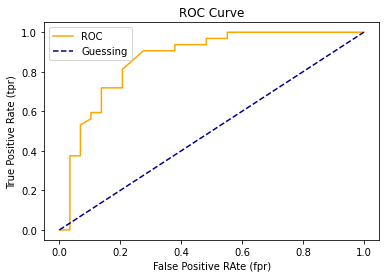

In [259]:
# create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    #plot the roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    #Plot line with no predictve power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False Positive RAte (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [260]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

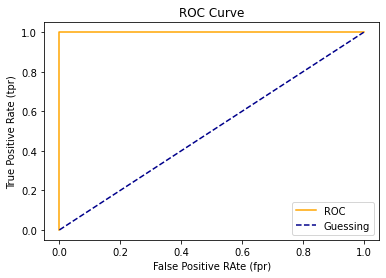

In [261]:
# plot perfect ROC curve and auc score
fpr,tpr,thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [262]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### Confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, telling where the model is getting confused.